References:
1.https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6
2.https://www.kaggle.com/CVxTz/audio-data-augmentation

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import librosa
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [ ]:
import os
import librosa   #for audio processing
import librosa.display
import IPython.display as ipd
import numpy as np
import pandas as pd
import random
import itertools
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
os.getcwd()

'/content'

In [ ]:
filepath = "/content/gdrive/My Drive/test_data/"
sound_path = filepath + '0a7c2a8d_nohash_0.wav'
#sound_path="/content/gdrive/My Drive/test_data/0a7c2a8d_nohash_0.wav"
x , sr = librosa.load(filepath+'0a7c2a8d_nohash_0.wav',sr =16000 , mono =True , offset = 0.0 ,duration = None)
len(x) , sr

#where sr==sampling_rate && x==sample

(16000, 16000)

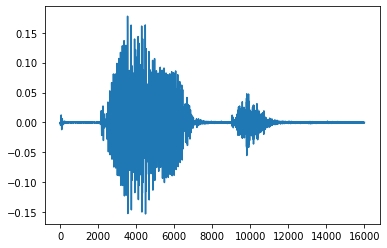

In [ ]:
plt.plot(x)

<class 'numpy.ndarray'> <class 'int'>
(16000,) 16000


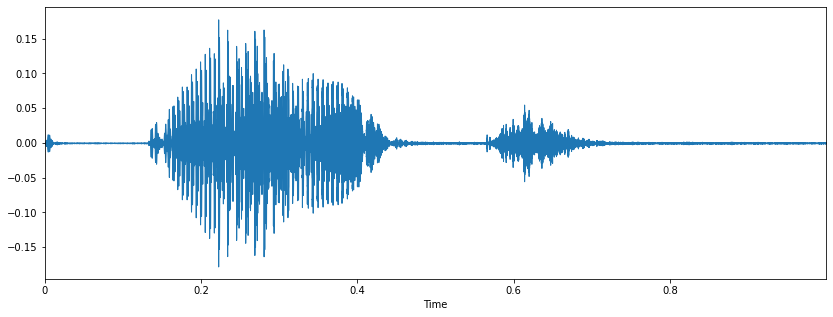

In [ ]:

print(type(x), type(sr))
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
duration = len(x)/sr
duration

1.0

In [ ]:
Audio(sound_path)

In [ ]:
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

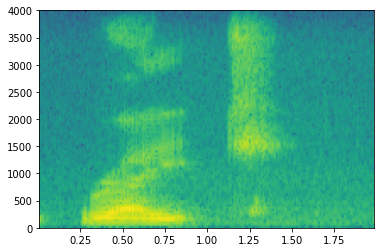

In [ ]:
x = graph_spectrogram(sound_path)

In [ ]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

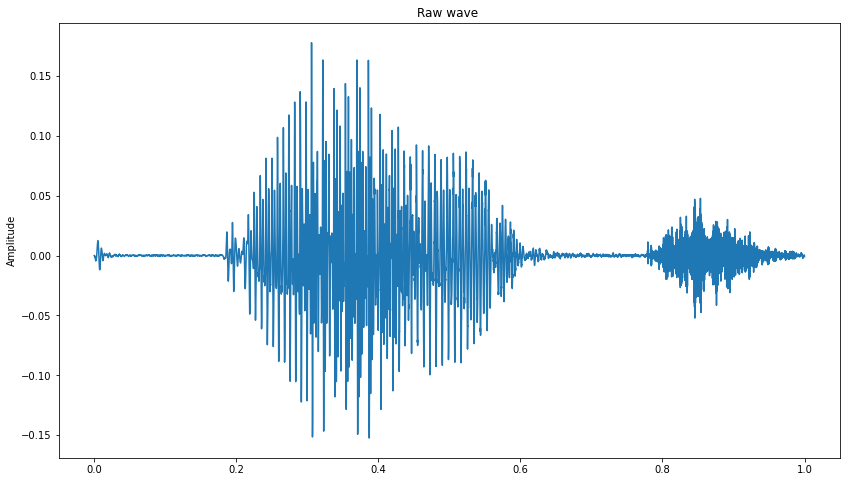

In [ ]:
data = load_audio_file(sound_path)
plot_time_series(data)

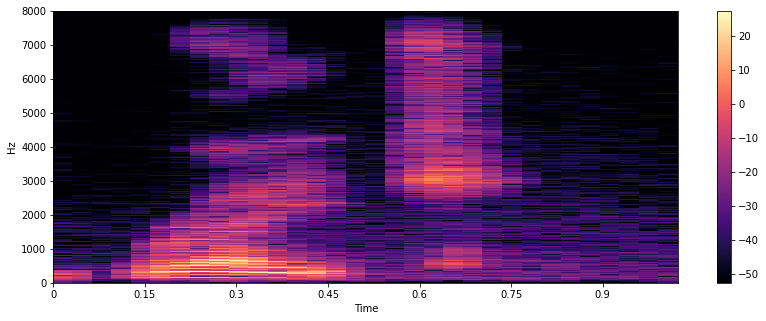

In [ ]:

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

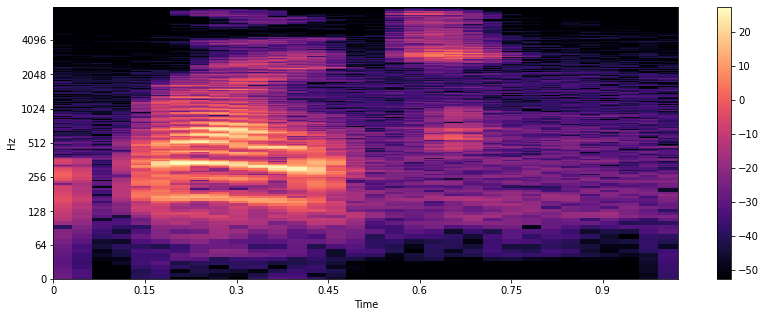

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
#Hear it ! 
ipd.Audio(data, rate=16000)

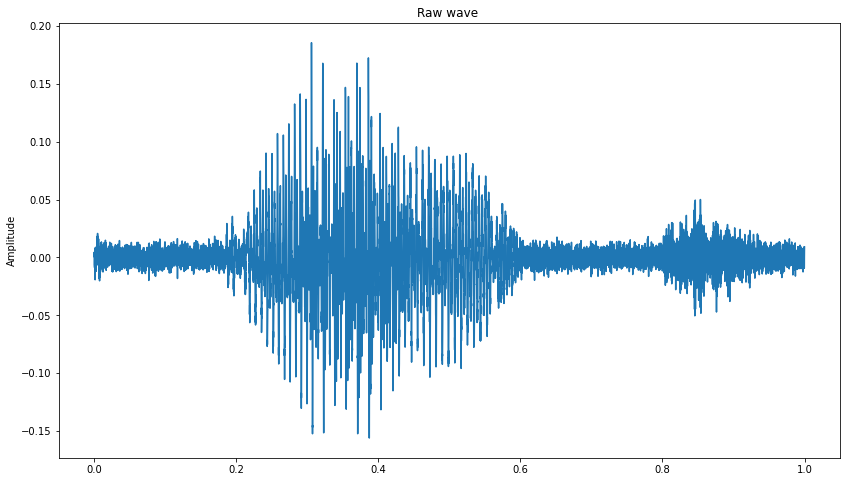

In [ ]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

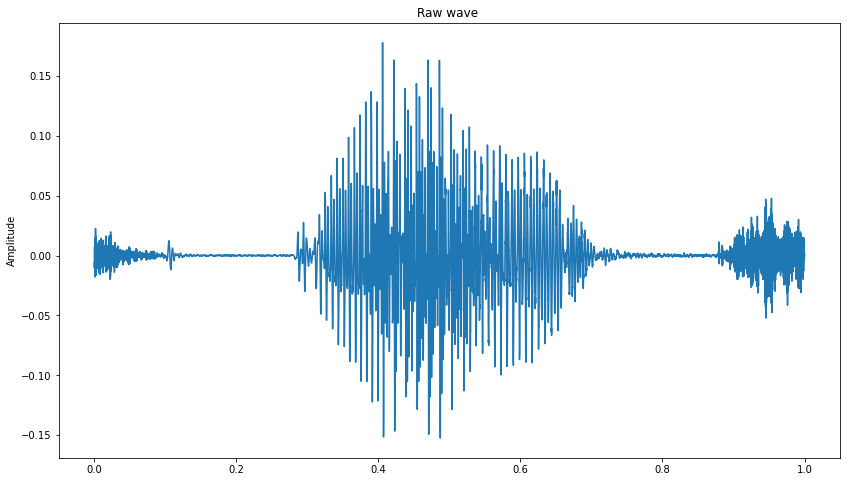

In [ ]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear the word 


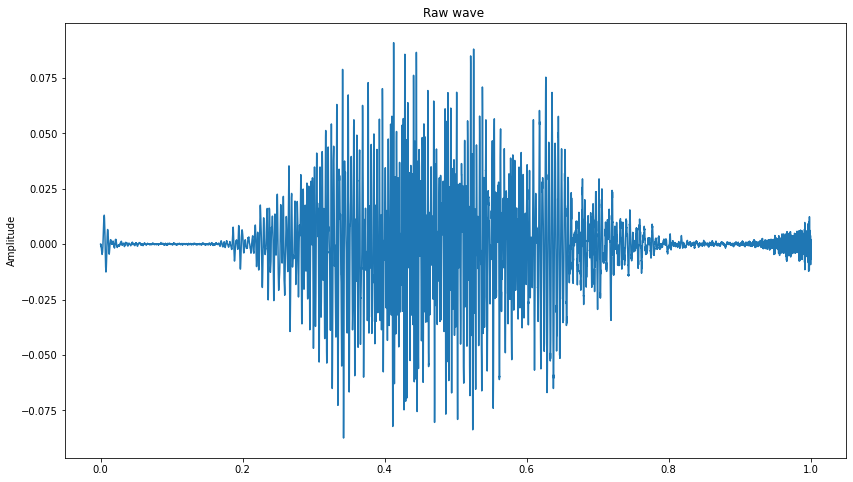

Higher frequencies  


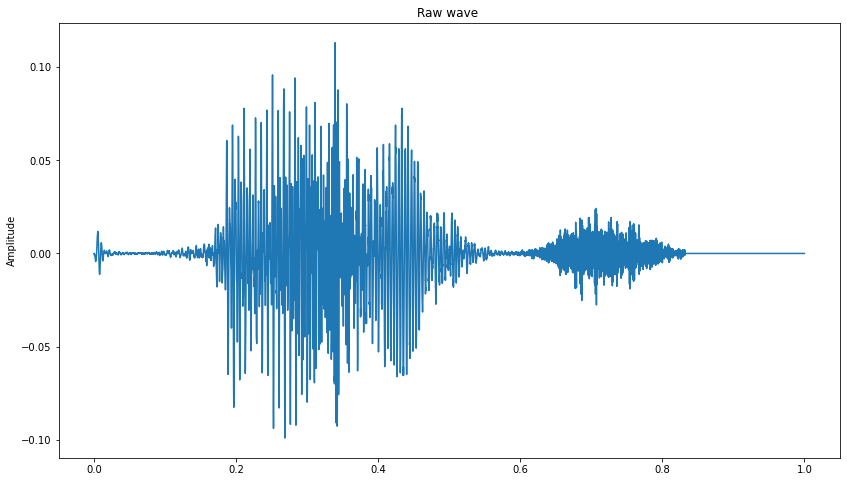

In [ ]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear the word ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

In [ ]:
#DataGenerator

In [ ]:
import os
import numpy as np 
import tensorflow as tf 
#import augmentation as aug

In [ ]:
!pip install pydub

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from pydub import AudioSegment
import random
import sys
import io
#import os
import glob
import IPython

In [ ]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = graph_spectrogram(filepath + ID )

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
      # Calculate and plot spectrogram for a wav audio file

    def __graph_spectrogram(self, wav_file):
      rate, data = wavfile.read(wav_file)
      nfft = 200 # Length of each window segment
      fs = 8000  #Sampling frequencies
      noverlap = 120 # Overlap between windows
      nchannels = data.ndim
      if nchannels == 1:
          pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
      elif nchannels == 2:
          pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
      return pxx

    #get labels from input word

    def __str_to_label(self, word):
      #array of length max string length, 0 padded (actually it should be blank token :p)
      label = np.zeros((self.max_string_len), dtype=int)
      for i in range(len(word)):
        label[i] = int(self.char_idx[word[i]])

      return label      